MODEL

1 SPLIT
2 FIT
3 PREDICT
4 EVALUATON-ACCURACY

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv('Car_Price_Prediction.csv')

In [59]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [60]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [61]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [62]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [63]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<AxesSubplot:>

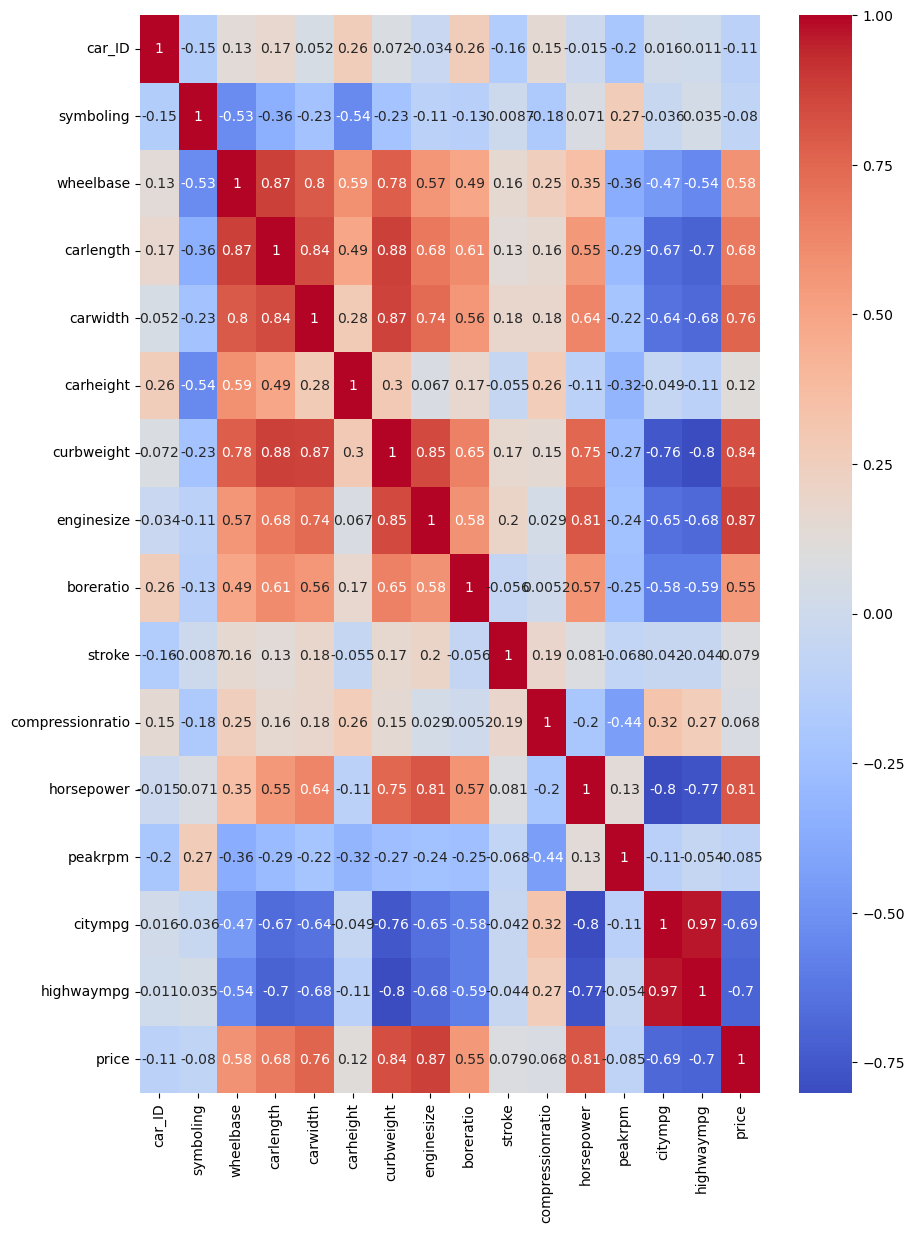

In [64]:
plt.figure(figsize=(10,14))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [65]:
# Split the data accordingly

from sklearn.model_selection import train_test_split

In [66]:
x = df[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm']]

In [67]:
x

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500
...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800


In [68]:
y= df.price*82.81

In [69]:
y

0      1117520.95
1      1366365.00
2      1366365.00
3      1155199.50
4      1445034.50
          ...    
200    1394934.45
201    1577116.45
202    1779172.85
203    1860740.70
204    1873576.25
Name: price, Length: 205, dtype: float64

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [48]:
x_train.shape

(143, 11)

In [49]:
x_test.shape

(62, 11)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(x_train,y_train)

LinearRegression()

In [53]:
y_pred = lr.predict(x_test)

In [54]:
y_pred

array([2161661.45949668, 1470821.04235998,  870058.9053445 ,
       1154661.3795088 , 2055538.88884745,  524172.95193279,
        700496.79848536,  574694.41915579,  985642.68828143,
        712300.45198093, 1288719.40258502,  554879.41007817,
       1251097.51390291,  776879.943391  , 3288380.90491455,
        462865.0602011 ,  -67542.96330308, 1285048.97505614,
        844161.67721962,  961057.9974299 ,  903796.9535171 ,
       1814680.03905795,  528154.12688582,  325093.80371064,
        526602.05989778, 2229649.64850638, 1108170.77121439,
       1475840.82626464,  516616.15497306, 1439904.32674653,
       1988623.38171873,  521899.71684643,  530235.02214812,
       1974900.73228167,  647005.02276873, 1977010.57940616,
        960681.84492623,  671704.96269549,  527012.13808951,
       1304610.5887943 ,  849024.46128001, 1008230.69174628,
       1488666.29618293,  528097.59348841,  521808.2477274 ,
        853889.02442165,  521899.71684643,  641328.51997598,
       1471099.20631882,

In [55]:
from sklearn.metrics import r2_score

In [56]:
r2_score(y_pred,y_test).round(2)

0.76

In [24]:
x_train

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm
177,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92,4200
75,102.7,178.4,68.0,54.8,2910,140,3.78,3.12,8.0,175,5000
174,102.4,175.6,66.5,54.9,2480,110,3.27,3.35,22.5,73,4500
31,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,76,6000
12,101.2,176.8,64.8,54.3,2710,164,3.31,3.19,9.0,121,4250
...,...,...,...,...,...,...,...,...,...,...,...
106,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,160,5200
14,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121,4250
92,94.5,165.3,63.8,54.5,1938,97,3.15,3.29,9.4,69,5200
179,102.9,183.5,67.7,52.0,3016,171,3.27,3.35,9.3,161,5200


In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
sc = MinMaxScaler()

In [73]:
x_train = sc.fit_transform(x_train)

In [74]:
x_test = sc.transform(x_test)

In [75]:
lr.fit(x_train,y_train)

LinearRegression()

In [76]:
y_pred = lr.predict(x_test)

In [77]:
y_pred

array([2161661.45949667, 1470821.04235997,  870058.9053445 ,
       1154661.37950879, 2055538.88884745,  524172.9519328 ,
        700496.79848536,  574694.4191558 ,  985642.68828143,
        712300.45198093, 1288719.40258501,  554879.41007818,
       1251097.51390291,  776879.94339101, 3288380.90491454,
        462865.0602011 ,  -67542.96330307, 1285048.97505614,
        844161.67721962,  961057.9974299 ,  903796.9535171 ,
       1814680.03905795,  528154.12688582,  325093.80371065,
        526602.05989778, 2229649.64850636, 1108170.77121439,
       1475840.82626463,  516616.15497306, 1439904.32674653,
       1988623.38171872,  521899.71684642,  530235.02214812,
       1974900.73228166,  647005.02276873, 1977010.57940616,
        960681.84492624,  671704.96269548,  527012.13808951,
       1304610.5887943 ,  849024.46128002, 1008230.69174628,
       1488666.29618293,  528097.59348842,  521808.2477274 ,
        853889.02442165,  521899.71684642,  641328.51997599,
       1471099.20631883,

In [78]:
r2_score(y_pred,y_test).round(2)

0.76

In [79]:
sc = MinMaxScaler()

In [80]:
x_train = sc.fit_transform(x_train)

In [81]:
x_test = sc.transform(x_test)

In [80]:
lr.fit(x_train,y_train)

LinearRegression()

In [82]:
y_pred = lr.predict(x_test)

In [78]:
r2_score(y_test,y_pred)

0.8110320935392182

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
sc = StandardScaler()

In [85]:
x_train = sc.fit_transform(x_train)

In [86]:
x_test  = sc.transform(x_test)

In [87]:
lr.fit(x_train,y_train)

LinearRegression()

In [88]:
y_pred = lr.predict(x_test)

In [89]:
r2_score(y_test,y_pred).round(2)

0.81